In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import math

MAT = pickle.load(open('MAT.p','rb')) 

In [8]:
matrix

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [22]:
matrix = np.array([[1, 1, 1], [0, 0, 0],[0, 0, 0]])

### entropy dynamics!

In [23]:
def probability_word(matrix,i):
    n=len(matrix)
    pm=1/float(n)
    return sum([pm*matrix[i][j]/float(sum(matrix[:,j])) for j in range(n)])

In [24]:
probability_word(matrix,0)

1.0

In [25]:
def probability_m_given_w(matrix,j,i):
    n=len(matrix)
    pm=1/float(n)
    if sum(matrix[i,:])>0 and probability_word(matrix,i)>0:
        return matrix[i][j]*pm/float(sum(matrix[:,j])*probability_word(matrix,i))
    else:
        return 0

In [26]:
probability_m_given_w(matrix,0,1)

0

In [27]:
def effort_hearer_w(matrix,i):
    n=len(matrix)
    return -sum([p*math.log(p,n) for p in [probability_m_given_w(matrix,j,i) for j in range(n)] if p>0])

In [28]:
effort_hearer_w(matrix,0)

1.0

In [29]:
def effort_hearer(matrix):
    n=len(matrix)
    return sum([probability_word(matrix,i)*effort_hearer_w(matrix,i) for i in range(n)])

In [30]:
effort_hearer(matrix)

1.0

In [31]:
def effort_speaker(matrix):
    n=len(matrix)
    probaS=[probability_word(matrix,i) for i in range(n)]
    probaS=[p for p in probaS if p>0]
    return -sum([p*math.log(p,len(matrix)) for p in probaS])

In [32]:
effort_speaker(matrix)

-0.0

In [ ]:
entropy_dynamics={key:[] for key in MAT.keys()}
for key in MAT.keys():
    print(key)
    M_seq=MAT[key]
    entropy_dynamics[key]=[[effort_speaker(M),effort_hearer(M)] for M in M_seq]

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52


In [ ]:
pickle.dump(entropy_dynamics,open('entropy_dynamics.p','wb')) ##distribucion

In [3]:
entropy_dynamics = pickle.load(open('entropy_dynamics.p','rb')) 

In [4]:
entropy_dynamics[0.5]

[[0.9994135839816676, 0.8605250868668443],
 [0.9383731732896375, 0.5174872898850444],
 [0.9371879444717467, 0.4047272079178197],
 [0.9431943589596251, 0.33122040502327815],
 [0.9311800556344343, 0.2860712613915243],
 [0.934255901076816, 0.2539770590292165],
 [0.9396788303639985, 0.2736437111768548],
 [0.9315802629758454, 0.2637441406605152],
 [0.9206684332782168, 0.2638746560035931],
 [0.9193064045798177, 0.25702518837419447],
 [0.9193101464670153, 0.2763686025521549],
 [0.8981182594113375, 0.2670632640578779],
 [0.8737954763045823, 0.28754142122414994],
 [0.8323196531217575, 0.31330115761506216],
 [0.8061825402959252, 0.30692542209788515],
 [0.7604161853928332, 0.3342880615298558],
 [0.7375021546537968, 0.35732219157032846],
 [0.735168193400632, 0.34495757581295466],
 [0.6825581849375226, 0.3728625515906799],
 [0.6528818908246061, 0.40210099143710193],
 [0.6427365945974753, 0.411385594238447],
 [0.63867995853027, 0.40836650485600434],
 [0.6138061972046888, 0.4220795518958714],
 [0.564

## omega versus time

In [5]:
Z=np.array(list(entropy_dynamics.keys()))

In [6]:
Z

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [7]:
omega={key:[] for key in entropy_dynamics.keys()}
for key in entropy_dynamics.keys():
    for item in entropy_dynamics[key]:
        omega[key]+=[key*item[1]+(1-key)*item[0]]

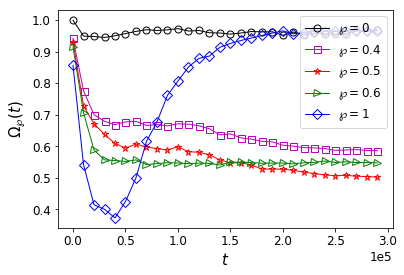

In [22]:
plt.plot([x*10000 for x in range(len(omega[0]))], list(omega[0]),color='k',linewidth=1,marker='o',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False,label=r'$\wp=0$')
plt.plot([x*10000 for x in range(len(omega[0.4]))], list(omega[0.4]),color='m',linewidth=1,marker='s',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False,label=r'$\wp=0.4$')
plt.plot([x*10000 for x in range(len(omega[0.5]))], list(omega[0.5]),color='r',linewidth=1,marker='*',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False,label=r'$\wp=0.5$')
plt.plot([x*10000 for x in range(len(omega[0.6]))], list(omega[0.6]),color='green',linewidth=1,marker='>',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False,label=r'$\wp=0.6$')
plt.plot([x*10000 for x in range(len(omega[1]))], list(omega[1]),color='b',linewidth=1,marker='D',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False,label=r'$\wp=1$')

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
plt.legend(loc='best')
#plt.title(r'$\wp=$'+str(p),fontsize=15)
plt.ylabel(r'$\Omega_\wp(t)$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('omega_time.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

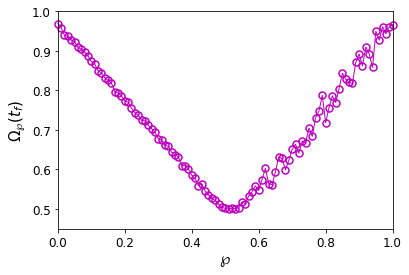

In [10]:
plt.plot(omega.keys(), [omega[key][-1] for key in omega.keys()],color='m',linewidth=1,marker='o',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False)

#plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
#plt.legend(loc='best')
#plt.title(r'$\wp=$'+str(p),fontsize=15)
plt.ylabel(r'$\Omega_\wp(t_f)$',fontsize=15)
plt.xlabel(r'$\wp$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.axis([0,1,0.45,1])
plt.savefig('omega_final.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [11]:
omega_final={key:omega[key][-1] for key in omega.keys()}

In [12]:
min(omega_final, key=lambda k: omega_final[k]) 

0.51

In [19]:
entropy_dynamics[0.5]

[[0.9994135839816676, 0.8605250868668443],
 [0.9383731732896375, 0.5174872898850444],
 [0.9371879444717467, 0.4047272079178197],
 [0.9431943589596251, 0.33122040502327815],
 [0.9311800556344343, 0.2860712613915243],
 [0.934255901076816, 0.2539770590292165],
 [0.9396788303639985, 0.2736437111768548],
 [0.9315802629758454, 0.2637441406605152],
 [0.9206684332782168, 0.2638746560035931],
 [0.9193064045798177, 0.25702518837419447],
 [0.9193101464670153, 0.2763686025521549],
 [0.8981182594113375, 0.2670632640578779],
 [0.8737954763045823, 0.28754142122414994],
 [0.8323196531217575, 0.31330115761506216],
 [0.8061825402959252, 0.30692542209788515],
 [0.7604161853928332, 0.3342880615298558],
 [0.7375021546537968, 0.35732219157032846],
 [0.735168193400632, 0.34495757581295466],
 [0.6825581849375226, 0.3728625515906799],
 [0.6528818908246061, 0.40210099143710193],
 [0.6427365945974753, 0.411385594238447],
 [0.63867995853027, 0.40836650485600434],
 [0.6138061972046888, 0.4220795518958714],
 [0.564

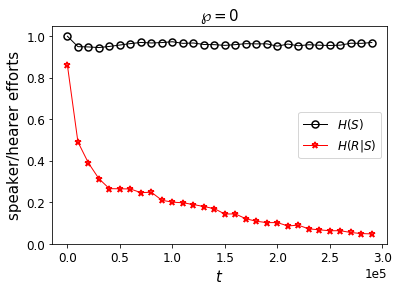

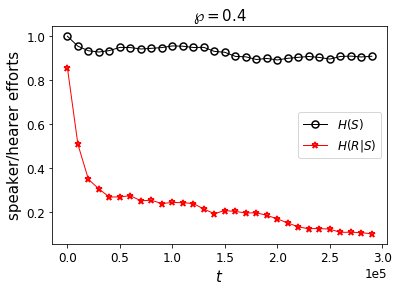

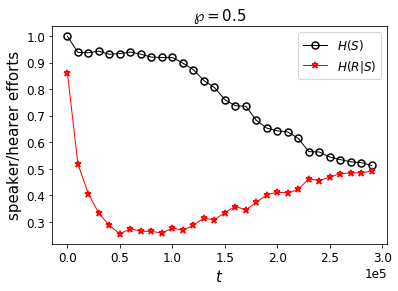

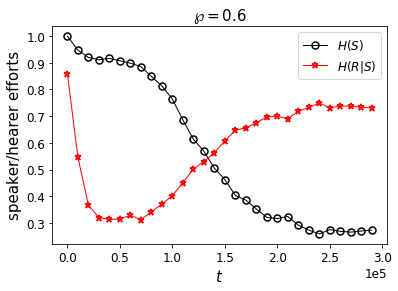

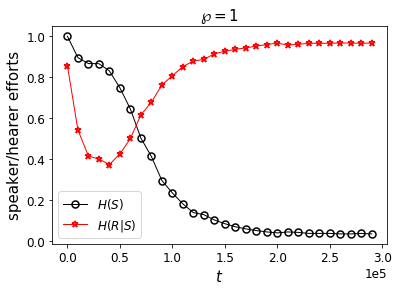

In [25]:
p_list=[0,0.4,0.5,0.6,1]

for p in p_list:

    plt.plot([x*10000 for x in range(len(entropy_dynamics[p]))], list(zip(*entropy_dynamics[p]))[0],color='k',linewidth=1,marker='o',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$H(S)$')
    plt.plot([x*10000 for x in range(len(entropy_dynamics[p]))], list(zip(*entropy_dynamics[p]))[1],color='r',linewidth=1,marker='*',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$H(R|S)$')

    plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
    plt.legend(loc='best')
    plt.title(r'$\wp=$'+str(p),fontsize=15)
    plt.ylabel('speaker/hearer efforts',fontsize=15)
    plt.xlabel(r'$t$',fontsize=15)
    plt.rcParams.update({'font.size': 12})
    plt.savefig('entropy_time_'+str(p).replace('.','')+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()
    plt.close()